<span style="color:cyan">


## MICROSOFT MOVIE STUDIO ANALYSIS

![microsoft hollywood](windows-hollywood-feature.jpg)

<span style="color:cyan">

##### AUTHOR : RONALD ONGORI NYAGAKA

<span style="color:blue">



### BUSINESS OVERVIEW




This analysis breaks down the threats to entry into the movie industry by Microsoft that is predominantly a technological company and makes recommendations to tackle this.

Insights gained from analysis of selected data sets dictates that Microsoft should use marketing and production strategies used by the top three movie studios

focus their initial movie production to some of the most popular genres and

keep in mind that huge movie budgets will not necessarily translate to 

higher returns instead they should look more into qualitative aspects of movie making like writing and hiring seasoned directors.

#

<span style="color:blue">


## BUSINESS PROBLEM


![business problems](problems3.png)



- Competition in the movie industry against popular movie studios
- Profitability in terms of Cost of production compared to the returns
- Finding the most popular genres to invest in


<span style="color:blue">

## DATA UNDERSTANDING 



![data understandng](dd.jpg)

##

The data sets provided contain a  varying array of information paramount to analyzing our business problems. Three data sets have been chosen:

im.db database which contains movie basics and rating tables that highlight different genres and their popularity as judged by the number of votes

t.movie_budget that gives a break down of costs and returns of movies that will sorted according to total grossing against the production budget

bom_movie_gross that gives a highlight of gross returns of movie studio of a certain amount of time



In [2]:
# IMPORTING ALL THE NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
conn = sqlite3.connect('im.db')
cur = conn.cursor()




### DATA CLEANING OF IM.DB DATABASE

In [3]:
# Finding the table names of all tables in our im.db database

cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cur.fetchall()
table_names


[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [4]:
# previewing the columns and rows of the first data set to get an understanding of the data contained

df1 = pd.read_sql("""
        SELECT*
        FROM movie_basics;
                  """, conn)
df1.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
# previewing the columns and rows of the second data set to get an understanding of the data contained

df2 = pd.read_sql("""
        SELECT*
        FROM movie_ratings;
                  """, conn)
df2.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
# combining the two tables and stripping off the columns that are not needed

df3  = pd.read_sql("""
         SELECT primary_title, start_year, genres, averagerating, numvotes
         FROM movie_basics AS MBB
         JOIN movie_ratings AS MRR
           ON MBB.movie_id = MRR.movie_id
          WHERE numvotes > 500000 AND averagerating > 7
          ORDER BY numvotes DESC
          LIMIT 50;          
                   """, conn)
df3.head()

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655


In [7]:
# determining whether there are any null values

df3.isna().sum()

primary_title    0
start_year       0
genres           0
averagerating    0
numvotes         0
dtype: int64

In [8]:
# determining whether duplicates exist 

df3.duplicated().value_counts()

False    50
dtype: int64

There no null or duplicated items in our data, the data is clean and we have made a dataframe (df3) containing all relevant columns for our analysis of 

popular genres as determined by numvotes column



##



### DATA CLEANING TN.MOVIE_BUDGET.CSV 

In [9]:
#loading and viewing the data

mov_budg = pd.read_csv('tn.movie_budgets.csv', index_col= 0)
mov_budg.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
# checking for null values within the data set.
mov_budg.isna().sum()


release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [11]:
# checking for duplicates in the data set

mov_budg.duplicated().value_counts()

False    5782
dtype: int64

In [12]:
# checking for the data type of each series in the data frame.

mov_budg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [13]:
# defining a function to help change specified columns from objects to floats.

def remove_symbols(dataframe):
    mov_budg[dataframe] = mov_budg[dataframe].apply(lambda x : float(x.replace('$', "").replace(",", "")))
    return mov_budg[dataframe]

remove_symbols('production_budget')
remove_symbols('domestic_gross')
remove_symbols('worldwide_gross')


id
1     2.776345e+09
2     1.045664e+09
3     1.497624e+08
4     1.403014e+09
5     1.316722e+09
          ...     
78    0.000000e+00
79    2.404950e+05
80    1.338000e+03
81    0.000000e+00
82    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

The release date is not relevant to our analysis as we are determining only the financials of the venture

In [14]:
# dropping the release date column as this will not be used during the analysis phase.

mov_budg = mov_budg.drop(['release_date'], axis=1)

A true picture of profitabilty can be determined by the return on investments

(net gross / production_budget )

In [15]:
# adding a return on investment column to determine the correlation earnings and costs and profitability between  different movies 

mov_budg['return_on_inv'] = ((mov_budg['worldwide_gross'] - mov_budg['production_budget']) / mov_budg['production_budget']).round(2)

In [16]:
# sorting out the movie titles from the most to least profitable using the return on investment column.
# the first row was removed since it depicted an outlier that had an ROI of 5 times the second highest grossing movie

mov_budg_sample= mov_budg.sort_values(by = 'return_on_inv', ascending= False).head(20).iloc[1:20]
mov_budg_sample

,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
id,,,,,
14,Mad Max,200000.0,8750000.0,99750000.0,497.75
93,Paranormal Activity,450000.0,107918810.0,194183034.0,430.52
80,The Gallows,100000.0,22764410.0,41656474.0,415.56
7,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.83
10,Super Size Me,65000.0,11529368.0,22233808.0,341.06
47,Bambi,858000.0,102797000.0,268000000.0,311.35
74,El Mariachi,7000.0,2040920.0,2041928.0,290.70
77,Night of the Living Dead,114000.0,12087064.0,30087064.0,262.92
11,Rocky,1000000.0,117235147.0,225000000.0,224.00


we have all the top profitable movies in our new dataframe (mov_budg_sample) , and outliers have been removed to standardize our findings

This will give us a correlation between production budget and the profitability

##

##

### DATA CLEANING BOM.MOVIE_GROSS.CSV


In [17]:
# loading the data

movie_gross = pd.read_csv('bom.movie_gross.csv')

In [18]:
# viewing basic info for the data set

movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [19]:
# getting a preview of the columns and some of the data

movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [20]:
# checking for duplicated indexes

movie_gross.duplicated().value_counts()


False    3387
dtype: int64

In [21]:
# viewing missing values as a ratio against the length of the entire data set.

movie_gross.isna().sum()/len(movie_gross)*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [22]:
# removing indexes with blank values from domestic gross
# removing indexes with blank values from studio
# dropping the foreign gross column since the missing values are on the higher side and these cant be filled since the movies earnings are not correlated

movie_gross.dropna(subset = ['domestic_gross'], axis =0, inplace = True)
movie_gross.drop('foreign_gross', axis=1, inplace= True )
movie_gross.dropna(subset = ['studio'], axis = 0, inplace= True)
movie_gross.isna().sum()


title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [23]:
# changing the year to datetime format

movie_gross['year']  = pd.to_datetime(movie_gross['year'])
movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3356 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   year            3356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 131.1+ KB


we have created our sample ( movie_gross) and cleared any indexes with null values

additionally the column foreign  gross has been dropped due to high ratio of missing data





#####





### ANALYZING FOR COMPETITION IN THE MOVIE INDUSTRY




This is an analysis of the top grossing studios in the industry using the movie_gross data set. 

This will be grouped by studio and the mean value of  domestic gross to determine 

the current top grossing studios in the industry and used to determine market share.


##

In [24]:
# creating a new dataframe grouped_movies that groups our original data set by studio and calculates mean of their domestic gross

grouped_movie = pd.DataFrame(movie_gross.groupby('studio')['domestic_gross'].mean())

In [25]:
# getting a sample of the fist 10 highest grossing studios

sample_studio = grouped_movie.sort_values(by = 'domestic_gross', ascending= False).head(10)

In [26]:
# getting a preview of the new data frame sample_studios

sample_studio

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.761177e+07
Par.,7.609773e+07
MGM,6.666667e+07


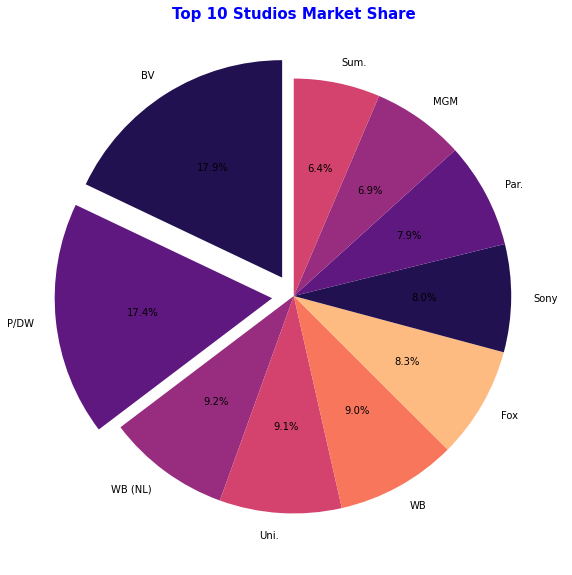

In [27]:

# plotting a pie chart of the mean against studios so as to get a better understanding of studio performance

# converting my parameters to percentages of the total_gross, this will denote my pie chart values.

total_gross = sample_studio['domestic_gross'].sum()
percentage_share = (sample_studio['domestic_gross'] / total_gross) *100
palette = sns.color_palette("magma")
fig, ax = plt.subplots(figsize = (15,10))
ax.pie(percentage_share, labels=sample_studio.index, explode = [ 0.1,0.1,0,0,0,0,0,0,0,0], colors=palette, autopct='%1.1f%%', startangle=90)
ax.set_title('Top 10 Studios Market Share', fontsize=15, fontweight='bold', color='blue')
ax.set_facecolor('lightgray')
plt.grid()
plt.show()

From the pie chart it can be seen that the competition to be wary of is BV and P/DW who carved out a huge percentage of the market share.

Another way to approach it is Microsoft could employ the strategies used by these studios

##

##

### ANALYZING COST OF PRODUCTION AGAINST THE RETURN ON INVESTMENT


This analysis attempts to find a correlation if any between the cost of production and return on investments

the line graph is plotted production budget against the return on investment

the dataset chosen for this is the mov_budg_sample
##

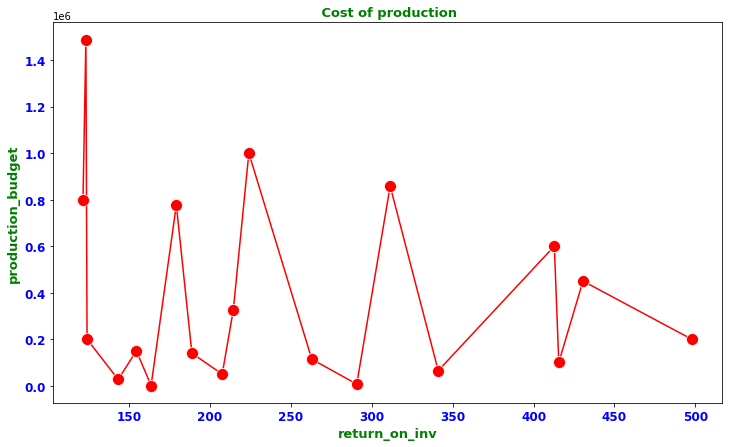

In [28]:

# plotting the graph and setting parameters

plt.figure(figsize= (12, 7))

sns.lineplot(x='return_on_inv',y='production_budget', data=mov_budg_sample, color = 'red', marker = 'o',
         markerfacecolor = 'red', markersize = 12)

plt.xlabel('return_on_inv',  fontsize = 13, fontweight = 'bold', color = 'green')
plt.ylabel('production_budget', fontsize = 13, fontweight = 'bold', color = 'green')
plt.title(' Cost of production',  fontsize = 13, fontweight = 'bold', color = 'green')
plt.xticks( fontsize = 12, fontweight = 'bold', color = 'blue')
plt.yticks( fontsize = 12, fontweight = 'bold', color = 'blue')
plt.show()


from this line plot it can be seen that there is no direct correlation between high budget movies and returns made

this can be surmised to mean that high spending will not necessarily translate to high returns which is dependent on audience numbers

They may have spent alot of making a high budget but not many people would watch either ddue to ratings or critic reviews

##

##

### ANALYZING FOR THE MOST POPULAR GENRES GOING BY NUMBER OF VOTES


For this analysis the df3 data frame from im.db database was used.

Column genres was grouped and numvotes mean calculated then sorted

from highest to largest to determine popularity of grouped genres

the number of votes was chosen since it indicated interaction from the audience  with the movies in those particular genres
##

In [29]:
# grouping the data by genre and calculating mean of num of votes, then transforming it into a data frame


pop_genre = pd.DataFrame(df3.groupby('genres')['numvotes'].mean()).sort_values( by = 'numvotes', ascending = False).iloc[:15]
pop_genre


,numvotes
genres,
"Action,Thriller",1.387769e+06
"Drama,Western",1.211405e+06
"Biography,Crime,Drama",1.035358e+06
"Mystery,Thriller",1.005960e+06
"Adventure,Drama,Sci-Fi",9.897250e+05
"Action,Adventure,Sci-Fi",7.947448e+05
"Action,Adventure,Fantasy",7.847800e+05
"Action,Adventure,Comedy",7.712503e+05
"Drama,Mystery,Thriller",7.615920e+05


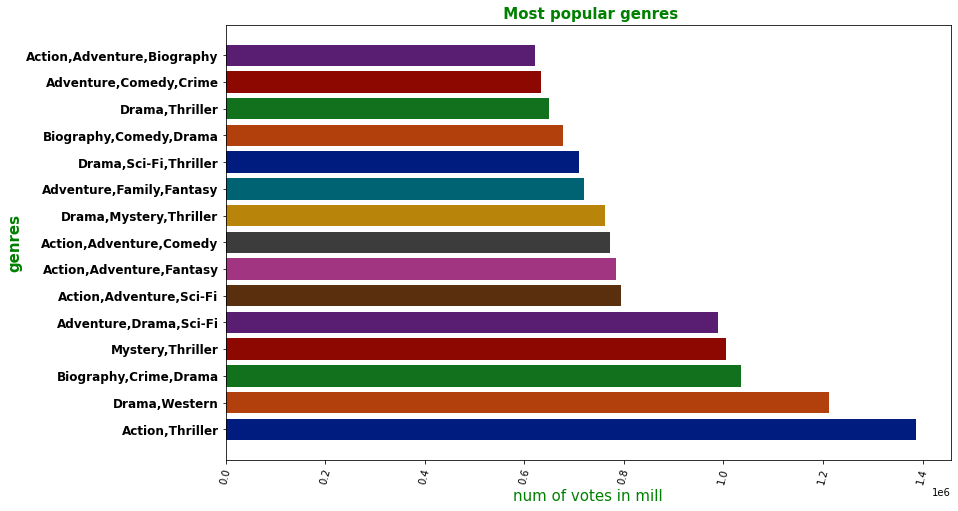

In [38]:
# setting parameters and plotting the graph of genres against number of votes


plt.figure(figsize= (13, 8))

palette = sns.color_palette("dark")

# plotting the graph and setting the labels and ticks

plt.barh(pop_genre['numvotes'].index, pop_genre['numvotes'].values, color = palette)
plt.xticks( rotation = 75, color = 'black', fontsize = 10)
plt.ylabel('genres',  fontsize = 15,fontweight = 'bold', color = 'green')
plt.xlabel('num of votes in mill', fontsize = 15, color = 'green')
plt.title(' Most popular genres',  fontsize = 15, fontweight = 'bold', color = 'green')
plt.yticks( fontsize = 12, fontweight = 'bold', color = 'black')
plt.show()

This indicates the Action, Thriller genres are the most popular with adventure biography being the least.

##

### ANALYZING FOR TOP RATED MOVIE CAST IN PARTICULAR DIRECTORS COMPARED AGAINST MOVIES PRODUCED AND THEIR AVERAGE RATINGS

#

This is an analysis of top directors from the im.db database.

This was weighed against number of movies made.

The average rating was determined and mean calculated so as to get consistency of their performance.

This is an analysis for recommendation purposes when it comes to hiring of staff for their first movies

so as to get consistent quality output


In [31]:
# importing all necessary libraries
import matplotlib.patches as mpatches


In [32]:
# getting director names, number of movies made and getting the mean of their ratings, this has been sourced from :-
# director Table, persons, movie_basics, and movie ratings tables


dir_rating = ("""
      SELECT DISTINCT   primary_name, AVG(averagerating), COUNT(primary_name)
      FROM directors
      JOIN persons ON directors.person_id = persons.person_id
      JOIN movie_basics ON movie_basics.movie_id = directors.movie_id
      JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id
      GROUP BY primary_name
      HAVING COUNT(primary_name) > 15 AND AVG(averagerating) > 8
      ORDER BY AVG(averagerating) DESC
              """)
dir= pd.read_sql(dir_rating,conn)

In [33]:
# passing dir_rating into a dataframe and selecting my sample to 8 most popular directors

pop_dir = pd.DataFrame(dir).head(8)
pop_dir

,primary_name,AVG(averagerating),COUNT(primary_name)
0,Sylvia Broeckx,9.000000,28
1,Lisa Gossels,9.000000,17
2,Erin Korbylo,9.000000,28
3,Dennis Korbylo,9.000000,28
4,Anthony Russo,8.246667,30
5,Joe Russo,8.180645,31
6,Pauli Janhunen Calderón,8.152174,23
7,Jaco Van Dormael,8.106250,16


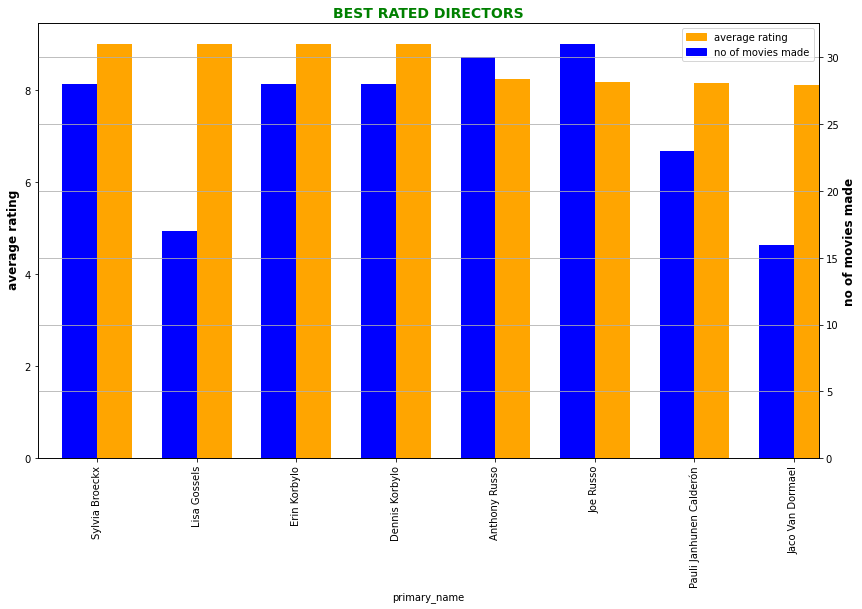

In [34]:
# setting graph size , width of the bars and assigning a second bar pli

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = .35

# setting the 'primary_name' as my x axis and assigning a variable popular

popular = pop_dir.set_index('primary_name')


# plotting my y axes editing colors and adding labels
popular['AVG(averagerating)'].plot(kind='bar',color='orange',ax=ax,width=width, position=0, label = 'average rating')
popular['COUNT(primary_name)'].plot(kind='bar', color = 'blue', ax=ax2,width = width,position=1, label = 'no of movies made')

# editing of titles and y labels
ax.set_title('BEST RATED DIRECTORS', fontweight='bold', fontsize = 14, color = 'green')
ax.set_ylabel(' average rating', fontweight='bold',fontsize = 12)
ax2.set_ylabel('no of movies made', fontweight='bold',fontsize = 12)

# Add the legend
orange_patch = mpatches.Patch(color='orange', label='average rating')
blue_patch = mpatches.Patch(color='blue', label='no of movies made')

plt.legend(handles=[orange_patch, blue_patch])

# showing the graph in my workbook
plt.grid()
plt.show()


This graph shows a varied discrepancy between number of movies made and ratings of the particular directors

Sylvia Broeckxx, Erin, and Dennis Korbylo have a higher rating compared to the rest and also a larger number of movies made

This is a visualization of talents in the movie industry with vast experience and high quality work that can be contracted 

to Microsoft's studio debut into the movie industry


<span style="color:blue">

## **CONCLUSION**

**These are the recommendation made from the analysis above**

##
- **Employ talented and experienced directors to spearhead the first slate of movies from Microsoft**
  
  this with a combination of good marketing strategies would ensure recognition of the new studio

- **Review expenditure into movie projects as this wont necessarily reap a proportional level of returns**

  they should look into other qualitative aspects that translates ticket sales into profits like better writing or story telling, better source material and talented cast.

- **Focus on making popular genres that resonate with the larger audience.**

- **Benchmark the most popular studios** to find out their playbook of what established them as predominant studios and whether they can adopt some of their strategies
  